In [42]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [43]:
df = pd.read_csv('MB/trainMobile.csv')
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


# 1
1. Quante sono le istanze contenute nel dataset? _______ Il dataset è completo (cioè per ogni
istanza tutti i valori di attributo sono sempre correttamente specificati – non esistono “missing
values”)? _______ Il dataset è bilanciato per quanto riguarda la classe da predire? _________
(punti 1).

In [44]:
print(df.shape[0])
print(df.isnull().sum())
print(df['price_range'].value_counts())

2000
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64
price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64


# 2
La variabile sc_w assume valori discreti o continui? Analizzare la distribuzione dei valori e
verificare se i telefoni costosi hanno mediamente una dimensione superiore di schermo.
Verificare se eliminando gli elementi con sc_w uguale a 0 il risultato cambia. (punti 2)

int64
[ 7  3  2  8  1 10  9  0 15 13  5 11  4 12  6 17 14 16 18]
Prezzo / larghezza :price_range
0    5.682
1    5.544
2    5.714
3    6.128
Name: sc_w, dtype: float64


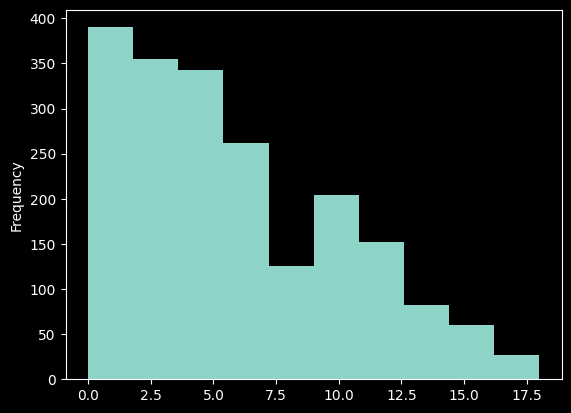

In [45]:
df['sc_w'].plot(kind='hist')
print(df['sc_w'].dtype)
print(df['sc_w'].unique())
# crosstab = pd.crosstab(df['price_range'], df['sc_w'])
# print(crosstab)

media_swc = df.groupby('price_range')['sc_w'].mean()
print(f'Prezzo / larghezza :{media_swc}')

Prezzo / larghezza pulito:price_range
0    5.682
1    5.544
2    5.714
3    6.128
Name: sc_w, dtype: float64


<Axes: ylabel='Frequency'>

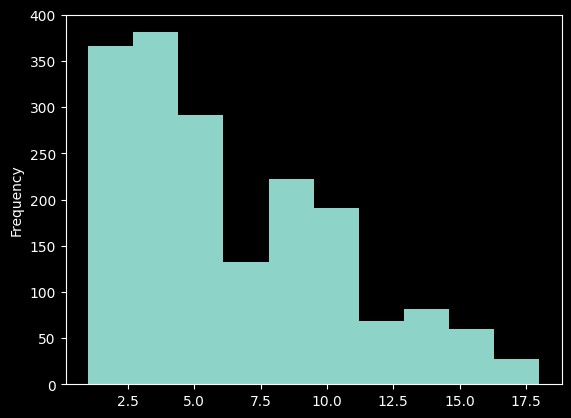

In [46]:

df_clean = df.drop(df.index[df['sc_w'] == 0])
media_swc_clean = df_clean.groupby('price_range')['sc_w'].mean()
print(f'Prezzo / larghezza pulito:{media_swc}')
df_clean['sc_w'].plot(kind='hist')

In [47]:
# Confronto
print("\nConfronto:")
print(pd.DataFrame({'Originale': media_swc, 'Pulito': media_swc_clean}))


Confronto:
             Originale    Pulito
price_range                     
0                5.682  6.299335
1                5.544  6.132743
2                5.714  6.265351
3                6.128  6.646421


Posso quindi dire che la dimensione cambia con il prezzo, ma non in modo lineare, infatti classe 0 in media è meglio di classe 1.
Inoltre togliendo gli 0 si è alzata la media, ma non cambia il trend.

# 3
E’ vero che mediamente i telefoni meno costosi hanno anche una batteria meno potente?
Realizzare 4 istogrammi (uno per ogni valore di price_range) che rappresentino la distribuzione
dei valori di battery power per ogni categoria. (punti 3)

Media batteria per ogni range di prezzo
price_range
0    1116.902
1    1228.868
2    1228.320
3    1379.984
Name: battery_power, dtype: float64


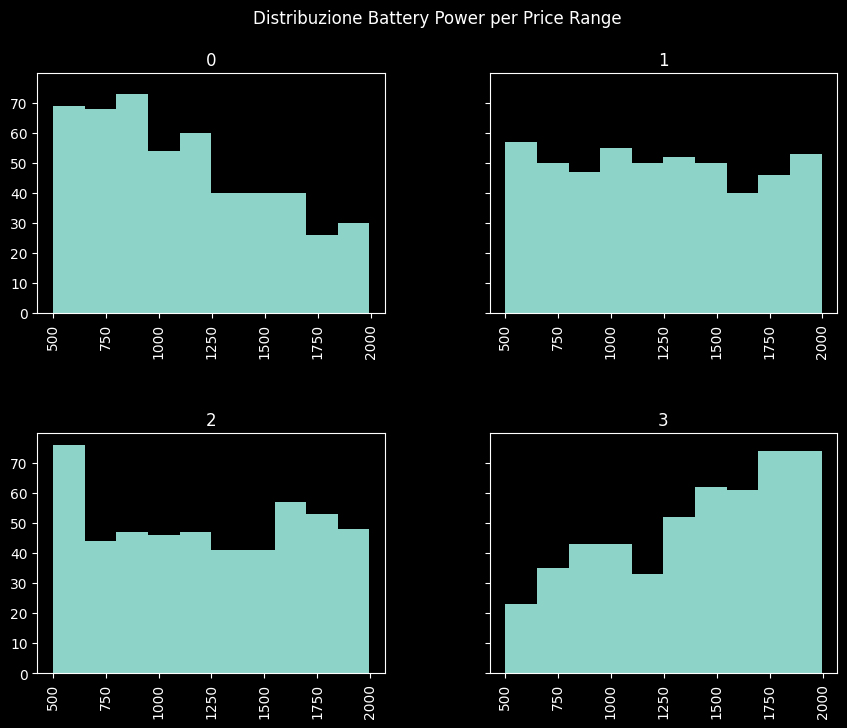

In [57]:
mean_battery = df.groupby('price_range')['battery_power'].mean()
print(f'Media batteria per ogni range di prezzo')
print(mean_battery)

# df[df['price_range'] == 0]['battery_power'].plot(kind='hist')
# df[df['price_range'] == 1]['battery_power'].plot(kind='hist')
# df[df['price_range'] == 2]['battery_power'].plot(kind='hist')
# df[df['price_range'] == 3]['battery_power'].plot(kind='hist')

# Crea automaticamente 4 istogrammi separati per la colonna 'price_range'
df['battery_power'].hist(by=df['price_range'], figsize=(10, 8), sharey=True)
plt.suptitle("Distribuzione Battery Power per Price Range") # Titolo generale
plt.show()

# 4
Verificare se tutti i telefoni che hanno il 4G hanno anche il 3G (punti 2)

In [66]:
# Cerchiamo i telefoni che hanno four_g=1 E three_g=0
eccezioni = df[(df['four_g'] == 1) & (df['three_g'] == 0)]

print(f"Numero di telefoni con 4G ma senza 3G: {len(eccezioni)}")

# Verifica logica
if len(eccezioni) == 0:
    print("VERO: Tutti i telefoni con 4G hanno anche il 3G.")
else:
    print("FALSO: Non tutti i telefoni con 4G hanno il 3G (ci sono eccezioni).")

Numero di telefoni con 4G ma senza 3G: 0
VERO: Tutti i telefoni con 4G hanno anche il 3G.


# 5
Quanti sono i telefoni 4G che non hanno wifi e bluetooth? (punti 2)

In [81]:
crosstab = pd.crosstab(index=[df['wifi'], df['blue']], columns=df['four_g'])
crosstab

four_g       0    1
wifi blue          
0    0     224  263
     1     239  260
1    0     266  257
     1     228  263

In [78]:
telefoni_target = df[(df['four_g'] == 1) & (df['wifi'] == 0) & (df['blue'] == 0)]

# Contiamo quante righe soddisfano queste condizioni
numero = len(telefoni_target)

print(f"Ci sono {numero} telefoni 4G che non hanno né WiFi né Bluetooth.")

Risposta Punto 5: Ci sono 263 telefoni 4G che non hanno né WiFi né Bluetooth.
